In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2yxofaau
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2yxofaau
  Resolved https://github.com/facebookresearch/detectron2.git to commit b7c7f4ba82192ff06f2bbb162b9f67b00ea55867
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6147762 sha256=e2a09dca179acee5860c766bd34e5

In [5]:
import os
import matplotlib.pyplot as plt

import torch
import cv2
import torch
from glob import glob
from tqdm import tqdm

# Detectron2
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import IPython
from IPython.display import Video, display
import warnings
warnings.simplefilter('ignore')

In [6]:
def play_video(video_path: str):
    frac = 0.65 # scaling factor for display
    display(
        Video(data=video_path, embed=True, height=int(720*frac), width=int(1280*frac))
    )

In [ ]:
# cfg = get_cfg()

# cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))

# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

# cfg.MODEL.DEVICE = "cuda:0"

In [8]:
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/Strykathon/config.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Strykathon/model_final.pth"
cfg.MODEL.DEVICE = "cuda:0"
predictor = DefaultPredictor(cfg)

In [9]:
# video -> frame
!mkdir -p frames
!ffmpeg -i /kaggle/input/nfl-player-contact-detection/train/58173_003606_Endzone.mp4 -q:v 2 -f image2 /kaggle/working/frames/frame_%04d.jpg -hide_banner -loglevel error

/kaggle/input/nfl-player-contact-detection/train/58173_003606_Endzone.mp4: No such file or directory


In [10]:
frames_paths = sorted(glob('/content/drive/MyDrive/Strykathon/test/*'))
print(frames_paths)

['/content/drive/MyDrive/Strykathon/test/s1_frame009.png', '/content/drive/MyDrive/Strykathon/test/s1_frame080.png', '/content/drive/MyDrive/Strykathon/test/s2_frame075.png', '/content/drive/MyDrive/Strykathon/test/s4_frame139.png', '/content/drive/MyDrive/Strykathon/test/s4_frame141.png', '/content/drive/MyDrive/Strykathon/test/s5_frame022.png', '/content/drive/MyDrive/Strykathon/test/s5_frame027.png', '/content/drive/MyDrive/Strykathon/test/s7_frame067.png']


In [11]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/Strykathon/test_json.json", "/content/drive/MyDrive/Strykathon/test")

In [12]:
from detectron2.data import MetadataCatalog, DatasetCatalog

val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

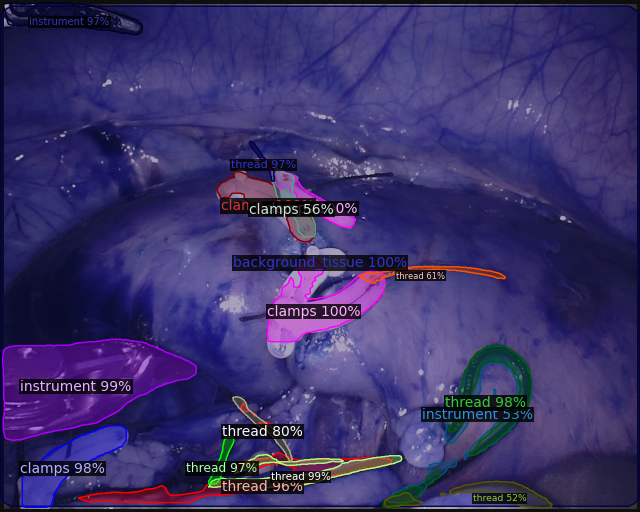

In [16]:
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from google.colab.patches import cv2_imshow

frame = cv2.imread(frames_paths[0])
# print(frame)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# outputs  = predictor(frame)
# v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

outputs = predictor(frame)

v = Visualizer(frame[:, :, ::-1],
                metadata=val_metadata,
                scale=0.5,
                instance_mode=ColorMode.IMAGE_BW)

outputs["instances"].remove("pred_boxes")
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# plt.figure(figsize=(15,15))
# plt.imshow(v.get_image()[:, :, ::-1])
cv2_imshow(out.get_image()[:, :, ::-1])

In [18]:
FPS = 15
height, width, c = out.get_image()[:, :, ::-1].shape
# frames_paths = frames_paths[::4]
# frames_path = "/content/drive/MyDrive/Hackathon/frames_test/s1"
# print(frames_paths)
# frames_paths = sorted(glob('/content/drive/MyDrive/Hackathon/frames_test/*'))
# print(frames_paths)

In [22]:
frames_paths

['/content/drive/MyDrive/Strykathon/test/s1_frame009.png',
 '/content/drive/MyDrive/Strykathon/test/s1_frame080.png',
 '/content/drive/MyDrive/Strykathon/test/s2_frame075.png',
 '/content/drive/MyDrive/Strykathon/test/s4_frame139.png',
 '/content/drive/MyDrive/Strykathon/test/s4_frame141.png',
 '/content/drive/MyDrive/Strykathon/test/s5_frame022.png',
 '/content/drive/MyDrive/Strykathon/test/s5_frame027.png',
 '/content/drive/MyDrive/Strykathon/test/s7_frame067.png']

In [29]:
output_path = "/content/drive/MyDrive/Strykathon/video/output1.mp4"

out = cv2.VideoWriter(
    output_path,
    cv2.VideoWriter_fourcc(*'VP90'),
    FPS,
    (width, height)
)


for paths in tqdm(frames_paths):
    cv2.waitKey(100)
    frame = cv2.imread(paths)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    outputs  = predictor(frame)
    v = Visualizer(frame[:, :, ::-1],
                metadata=val_metadata,
                scale=0.5,
                instance_mode=ColorMode.IMAGE_BW)
    outputs["instances"].remove("pred_boxes")
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    out.write(v.get_image()[:, :, ::-1])

out.release()

100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


In [30]:
play_video("/content/drive/MyDrive/Strykathon/video/output1.mp4")